<a href="https://colab.research.google.com/github/andreacohen7/healthcare/blob/main/Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tumor Classification
- Andrea Cohen
- 01.09.23

## Task:
  - Using the Wisconsin Breast Cancer Dataset, predict whether a tumor cell is malignant (m) or benign (b).

### Preliminary Steps:

#### Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
from sklearn import set_config
set_config(display='diagram')

#### Import data

In [ ]:
path = '/content/wisconsinBreastCancer - wisconsinBreastCancer.csv'
df = pd.read_csv(path, index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Explore the data

In [ ]:
display(df.info())
display(df.describe())
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(f'There are {df.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

None

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There are 569 rows, and 31 columns.
There are 0 duplicate rows.
There are 0 missing values.


#### Logistic Regression with default parameters

#### Convert the string names of the classes to numeric values

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

#### Arrange data into a features matrix and a target vector

In [ ]:
y = df['diagnosis']
X = df.drop(columns='diagnosis')

#### Train test split (model validation)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Scale the data using a model pipeline, fit the pipeline on the training data, evaluate the model's performance on the test set

In [ ]:
logreg = LogisticRegression()
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.9859154929577465
0.9790209790209791


##### L1 tuning

{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

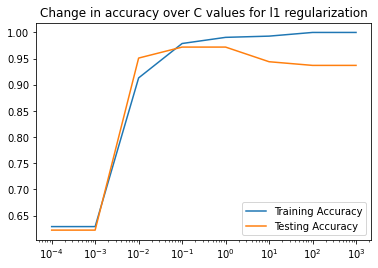

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.set_xscale('log')
{c:score for c, score in zip(c_values, test_scores)}

  - When C = 0.1, the accuracy on the test set is highest.

##### L2 tuning

{0.0001: 0.951048951048951,
 0.001: 0.951048951048951,
 0.01: 0.9790209790209791,
 0.1: 0.993006993006993,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.951048951048951,
 1000: 0.9370629370629371}

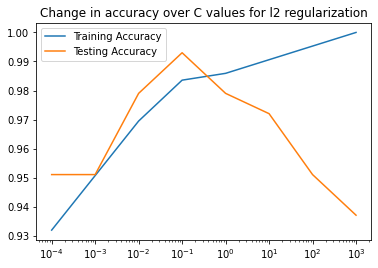

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
fix, ax = plt.subplots(1, 1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
ax.set_xscale('log')
{c:score for c, score in zip(c_values, test_scores)}

  - When C = 0.1, the accuracy on the test set is highest.

#### Solver tuning

{'liblinear': 0.993006993006993,
 'lbfgs': 0.986013986013986,
 'newton-cg': 0.986013986013986,
 'sag': 0.986013986013986,
 'saga': 0.986013986013986}

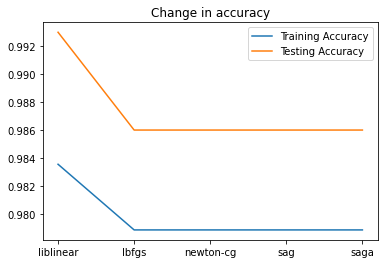

In [ ]:
s_values = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
train_scores = []
test_scores = []
for s in s_values:
  log_reg = LogisticRegression(C=0.1, max_iter=1000, solver=s, penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
fix, ax = plt.subplots(1, 1)
ax.plot(s_values, train_scores, label = 'Training Accuracy')
ax.plot(s_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(s_values)
ax.set_title('Change in accuracy')
ax.legend()
{s:score for s, score in zip(s_values, test_scores)}

{'liblinear': 0.972027972027972, 'saga': 0.965034965034965}

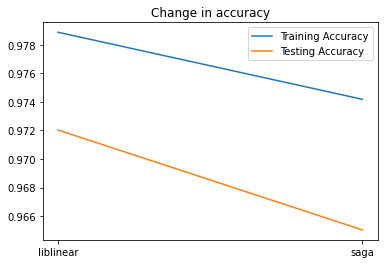

In [ ]:
s_values = ['liblinear', 'saga']
train_scores = []
test_scores = []
for s in s_values:
  log_reg = LogisticRegression(C=0.1, max_iter=1000, solver=s, penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
fix, ax = plt.subplots(1, 1)
ax.plot(s_values, train_scores, label = 'Training Accuracy')
ax.plot(s_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(s_values)
ax.set_title('Change in accuracy')
ax.legend()
{s:score for s, score in zip(s_values, test_scores)}

  - When using the 'liblinear' solver and the 'l2' penalty, the accuracy on the test set is highest.

#### Final Logistic Regression Model Evaluation

##### Accuracy

In [ ]:
lr_tuned = LogisticRegression(C=0.1, max_iter=1000, solver=s, penalty='l2')
lr_tuned_pipe = make_pipeline(scaler, lr_tuned)
lr_tuned_pipe.fit(X_train, y_train)
train_preds_lr_tuned = lr_tuned_pipe.predict(X_train)
test_preds_lr_tuned = lr_tuned_pipe.predict(X_test)
accuracy_lr = accuracy_score(y_test, test_preds_lr_tuned)
accuracy_lr

0.986013986013986

  - The final Logistic Regression model is 98.60% accurate for making correct predictions on the test set.

##### Recall

In [ ]:
recall_lr = recall_score(y_test, test_preds_lr_tuned)
recall_lr

0.9629629629629629

  - The final Logistic Regression model was 96.30% sensitive for predicting actual malignant tumors.


##### Precision

In [ ]:
precision_lr = precision_score(y_test, test_preds_lr_tuned)
precision_lr

1.0

  - The final Logistic Regression model had 100% specificity for predicting actual malignant tumors.

##### Confusion Matrix Display

Logistic Regression Confusion Matrix


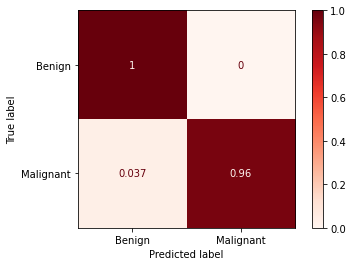

In [ ]:
print('Logistic Regression Confusion Matrix')
labels = ['Benign', 'Malignant']
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_lr_tuned, display_labels = labels, cmap = 'Reds', normalize = 'true');

  - The final Logistic Regression model successfully classified 100% of the benign samples and 96% of the malignant samples.

##### Classification Report

In [ ]:
print('Logistic Regression Classification Report')
print(classification_report(y_test, test_preds_lr_tuned))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



  - The final Logistic Regression model had f1-scores of 99% for the benign class and 98% for the malignant class.

#### KNN with default parameters

#### Scale the data using a model pipeline, fit the pipeline on the training data, predict the values for the test set, evaluate the model's performance on the test set

In [ ]:
knn = KNeighborsClassifier()
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
print(knn_pipe.score(X_train, y_train))
print(knn_pipe.score(X_test, y_test))

0.9788732394366197
0.958041958041958


#### Tuning hyperparameters using GridSearchCV and pipelines

##### Choose parameters for tuning

In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

##### Create a parameter grid dictionary

In [ ]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,50),
              'kneighborsclassifier__p': range(1,10),
              'kneighborsclassifier__weights': ['distance','uniform']}

##### Instantiate the GridSearchCV Class.

In [ ]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)

##### Fit the GridSearchCV on the Training Data.

In [ ]:
knn_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 50),
                         'kneighborsclassifier__p': range(1, 10),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

##### Find the best parameters

In [ ]:
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.958041958041958


#### Final KNN Model Evaluation

##### Accuracy

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = 5, p = 4, weights = 'distance')
knn_tuned_pipe = make_pipeline(scaler, knn_tuned)
knn_tuned_pipe.fit(X_train, y_train)
train_preds_knn_tuned = knn_tuned_pipe.predict(X_train)
test_preds_knn_tuned = knn_tuned_pipe.predict(X_test)
accuracy_knn = accuracy_score(y_test, test_preds_knn_tuned)
accuracy_knn

0.958041958041958

  - The final KNN model is 95.80% accurate for making correct predictions on the test set.  The final Logistic Regression model was more accurate.

##### Recall

In [ ]:
recall_knn = recall_score(y_test, test_preds_knn_tuned)
recall_knn

0.9444444444444444

  - The final KNN model had 94.44% recall.  The final Logistic Regression model had higher recall.

##### Precision

In [ ]:
precision_knn = precision_score(y_test, test_preds_knn_tuned)
precision_knn

0.9444444444444444

  - The final KNN model had 94.44% precision.  The final Logistic Regression model was more precise.

##### Confusion Matrix Display

KNN Confusion Matrix


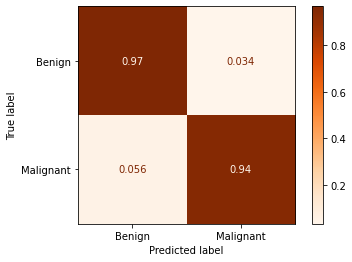

In [ ]:
print('KNN Confusion Matrix')
labels = ['Benign', 'Malignant']
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_knn_tuned, display_labels = labels, cmap = 'Oranges', normalize = 'true');

  - The final KNN model successfully classified 97% of the benign samples and 94% of the malignant samples.  The final Logistic Regression model was more successful at classifying both classes.

##### Classification Report

In [ ]:
print('KNN Classification Report')
print(classification_report(y_test, test_preds_knn_tuned))

KNN Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



  - The final KNN model had f1-scores of 97% for the benign class and 94% for the malignant class.
  - The final Logistic Regression model had higher f1-scores for both classes.

#### Random Forest Classification with default parameters

#### Instantiate the model, fit the model on the training data, predict the values for the test set, evaluate the model's performance on the test set

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.965034965034965


#### Tuning hyperparameters using GridSearchCV

##### Choose parameters for tuning

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##### Create a parameter grid dictionary

In [ ]:
param_grid = {'max_depth': range(1,11),
              'n_estimators': [50, 100, 150, 200, 250],
              'min_samples_split': [2, 10, 100]}

##### Instantiate the GridSearchCV Class.

In [ ]:
rf_grid_search = GridSearchCV(rf, param_grid)

##### Fit the GridSearchCV on the Training Data.

In [ ]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250]})

##### Find the best parameters

In [ ]:
print('Best Random Forest Classifier Parameters:')
print(rf_grid_search.best_params_)
best_model = rf_grid_search.best_estimator_
print(f'Accuracy of best Random Forest Classifier model is: {best_model.score(X_test, y_test)}')

Best Random Forest Classifier Parameters:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of best Random Forest Classifier model is: 0.965034965034965


##### Examine the best parameters found by the GridSearchCV object

In [ ]:
param_grid2 = {'max_depth': range(7,15),
              'n_estimators': range(40,50),
              'min_samples_split': range(2,5)}
rf_grid_search2 = GridSearchCV(rf, param_grid2)
rf_grid_search2.fit(X_train, y_train)
print(rf_grid_search2.best_params_)
best_rf = rf_grid_search2.best_estimator_
print(f'Accuracy of best Random Forest Classifier model is: {best_rf.score(X_test, y_test)}')

{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 42}
Accuracy of best Random Forest Classifier model is: 0.965034965034965


#### Final Random Forest Classifier Model Evaluation

##### Accuracy

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 8, min_samples_split = 4, n_estimators = 42, random_state=42)
rf_tuned.fit(X_train, y_train)
train_preds_rf_tuned = rf_tuned.predict(X_train)
test_preds_rf_tuned = rf_tuned.predict(X_test)
accuracy_rf = accuracy_score(y_test, test_preds_rf_tuned)
accuracy_rf

0.965034965034965

  - The final Random Forest Classifier model is 96.5% accurate for making correct predictions on the test set.
  - The final KNN model was less accurate, and the final Logistic Regression model was more accurate. 

##### Recall

In [ ]:
recall_rf = recall_score(y_test, test_preds_rf_tuned)
recall_rf

0.9444444444444444

  - The final Random Forest Classifier model had 94.44% recall.
  - The final KNN model had the same recall, and the final Logistic Regression model had higher recall.

##### Precision

In [ ]:
precision_rf = precision_score(y_test, test_preds_rf_tuned)
precision_rf

0.9622641509433962

  - The final Random Forest Classifier model had 96.23% precision.  
  - The final KNN model was less precise, and the final Logistic Regression model was more precise.

##### Confusion Matrix Display

Random Forest Classifier Confusion Matrix


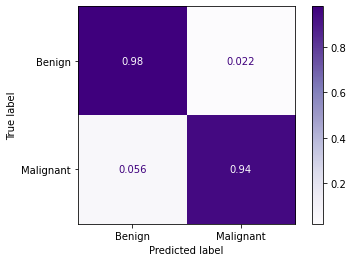

In [ ]:
print('Random Forest Classifier Confusion Matrix')
labels = ['Benign', 'Malignant']
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_rf_tuned, display_labels = labels, cmap = 'Purples', normalize = 'true');

  - The final Random Forest Classifier successfully classified 98% of the benign samples and 94% of the malignant samples.
  - The final KNN model was less successful at classifying the benign samples and equally successful at classifying the malignant samples.
  - The final Logistic Regression model was more successful at classifying both classes.

##### Classification Report

In [ ]:
print('Random Forest Classifier Classification Report')
print(classification_report(y_test, test_preds_rf_tuned))

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



  - The final Random Forest Classifier model had f1-scores of 97% for the benign class and 95% for the malignant class.
  - The final KNN model had the same f1-score for the benign class and a lower f1-score for the malignant class.
  - The final Logistic Regression model had higher f1-scores for both classes.

## Which hyperparameters did you tune for each of the models?

- The Logistic Regression model was tuned for c_value (the weight of the training data vs the weight of the complexity penalty), max_iter (the maximum number of iterations taken for the solvers to converge), solver (the algorithm to use in the optimization problem), and penalty (the penalty term added to the weights that the model uses to make predictions).
- The KNN model was tuned for n_neighbors (the number of neighbors), p (the power parameter for the Minkowski metric), and weights (the weight function used in prediction).
- The Random Forest Classifier was tuned for max_depth (the number of splits that each decision tree is allowed to make), n_estimators (the number of trees to build before making predictions), and min_samples_split (the minimum number of samples required to split an internal node). 


## Which model would you put into production to diagnose malignant tumors?

- The Logistic Regression model performed best for all evaluation metrics in this task.  It was 98.60% accurate for making correct predictions on the test set, it had 96.30% recall, and it had 100% precision.  It successfully classified 100% of the benign samples and 96% of the malignant samples.

## How does consideration of the meaning of false positive and false negative errors affect how you determine what 'best' means in this case?

- A false positive error occurs when a benign tumor is misdiagnosed as malignant, and a false negative error occurs when a malignant tumor is misdiagnosed as benign.  For this task, a false negative error is worse, because necessary treatment would likely not be given.  All three models had some false negative errors, but the Logistic Regression had fewer than the other two models.